## Preprocessing

In [1]:
import json
import pandas as pd
from textblob import TextBlob

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        statuses_count = [t['user']['statuses_count'] for t in self.tweets_list]
        return statuses_count
        
    def find_full_text(self)->list:
        texts = []
        for t in self.tweets_list:
            if 'retweeted_status' in t and 'extended_tweet' in t['retweeted_status']:
                texts.append(t['retweeted_status']['extended_tweet']['full_text'])
            else:
                texts.append(t['text'])
        return texts
       
#############################################
    def find_sentiments(self, text)->list:
        polarity,subjectivity = [],[]
        for tx in text:
            blob = TextBlob(tx)
            polarity.append(blob.polarity)
            subjectivity.append(blob.subjectivity)
        return polarity, subjectivity
            
        return [0 for t in self.tweets_list], [0 for t in self.tweets_list]
###############################################
    def find_created_time(self)->list:
       
        return [t['created_at'] for t in self.tweets_list]

    def find_source(self)->list:
        source = [t['source'] for t in self.tweets_list]
        return source

    def find_screen_name(self)->list:
        screen_name = [t['user']['screen_name'] for t in self.tweets_list]
        return screen_name

    def find_followers_count(self)->list:
        followers_count = [t['user']['followers_count'] for t in self.tweets_list]
        return followers_count

    def find_friends_count(self)->list:
        friends_count = [t['user']['friends_count'] for t in self.tweets_list]
        return friends_count
##################################################
    def is_sensitive(self)->list:
        sensitivity = []
        for t in self.tweets_list:
            try:
                is_sensitive = t['possibly_sensitive']
            except KeyError:
                is_sensitive = None
            sensitivity.append(is_sensitive)

        return sensitivity
###################################################
    def find_favourite_count(self)->list:
        favourites_count = []
        for t in self.tweets_list:
            if 'retweeted_status' in t:
                favourites_count.append(t['retweeted_status']['favorite_count'])
            else:
                favourites_count.append(t['favorite_count'])
        return favourites_count
    
    def find_retweet_count(self)->list:
        retweet_count = []
        for t in self.tweets_list:
            if 'retweeted_status' in t:
                retweet_count.append(t['retweeted_status']['retweet_count'])
            else:
                retweet_count.append(t['retweet_count'])
        return retweet_count

    def find_hashtags(self)->list:
        hashtags = [t['entities']['hashtags'] for t in self.tweets_list]
        return hashtags

    def find_mentions(self)->list:
        mentions = [t['entities']['user_mentions'] for t in self.tweets_list]
        return mentions

    def find_location(self)->list:
        locations = []
        for t in self.tweets_list:
            try:
                location = t['user']['location']
            except TypeError:
                location = ''
            locations.append(location)
        return locations

    def find_lang(self)->list:
        langs = [t['lang'] for t in self.tweets_list]
        return langs
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at','statuses_count', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        statuses_count = self.find_statuses_count()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = list(zip(created_at,statuses_count, source, text, polarity, subjectivity, lang, fav_count, retweet_count, screen_name, follower_count, friends_count, sensitivity, hashtags, mentions, location))
        df = pd.DataFrame(data=data, columns=columns)
        
        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df


if __name__ == "__main__":
    _, tweet_list = read_json("./covid19.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df()
    


In [2]:
tweet_df.head()

,created_at,statuses_count,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,204051,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,3462,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,6727,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,45477,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,277957,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [3]:
#import pandas as pd
class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self, df:pd.DataFrame):
        self.df = df
        self.df = self.remove_non_english_tweets(self.df)
        self.df = self.convert_to_numbers(self.df)
        self.df = self.drop_duplicate(self.df)
        
        
        
        print('Automation in Action...!!!')
        
    def drop_unwanted_column(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove rows that has column names. This error originated from
        the data collection stage.  
        """
        unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(unwanted_rows , inplace=True)
        # df = df[df['polarity'] != 'polarity']
        
        return df
    def drop_duplicate(self, df:pd.DataFrame)->pd.DataFrame:
        """
        drop duplicate rows
        """
        
        df["original_text"]=df["original_text"].astype(str)
        df.drop_duplicates(subset=["original_text"] , inplace=True)

        return df
    def convert_to_datetime(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert column to datetime
        """
        df['created_at']=pd.to_datetime(df['created_at'], format='%d %m %y*')
        
        return df
    
    def convert_to_numbers(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """
        df['polarity'] = pd.to_numeric(df['polarity'],errors='coerce')
        df['subjectivity'] = pd.to_numeric(df['subjectivity'],errors='coerce')
        df['retweet_count'] = pd.to_numeric(df['retweet_count'],errors='coerce')
        df['favorite_count'] = pd.to_numeric(df['favorite_count'],errors='coerce')
        
        df['followers_count'] = pd.to_numeric(df['followers_count'],errors='coerce')
        
        df['friends_count'] = pd.to_numeric(df['friends_count'],errors='coerce')
        
        return df
    
    def remove_non_english_tweets(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove non english tweets from lang
        """
        unwanted_rows=df[df['lang'] != "en"].index

        df.drop(unwanted_rows ,inplace=True)
        
        return df

In [4]:
clean_df = Clean_Tweets(tweet_df).df

Automation in Action...!!!


In [5]:
clean_df.head()

,created_at,statuses_count,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,204051,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,3462,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,6727,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,45477,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,277957,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [6]:
mydataset = clean_df[['original_text','polarity','subjectivity']]
mydataset.head()

,original_text,polarity,subjectivity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556
2,Thank you @research2note for creating this ama...,0.316667,0.483333
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222
4,I think it’s important that we don’t sell COVA...,0.280000,0.620000


### cleaning text

In [7]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
mydataset['clean_text'] = mydataset['original_text'].map(lambda x: cleaner(x))
mydataset.head()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,original_text,polarity,subjectivity,clean_text
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,"🚨 is "" in the midst of a full - blown third wa..."
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,"is head of WHO in , and one of the best public..."
2,Thank you @research2note for creating this ama...,0.316667,0.483333,Thank you for this amazing campaign & ; turnin...
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,"Former and Virologist , . , is one of the most..."
4,I think it’s important that we don’t sell COVA...,0.280000,0.620000,I think it ’ s important that we don ’ t sell ...


## Topic Modelling

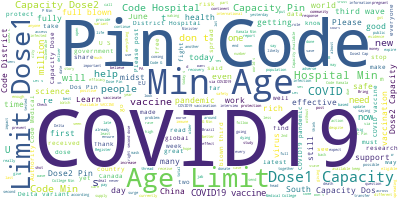

In [8]:
from wordcloud import WordCloud

long_string = ','.join(list(mydataset['clean_text'].values))

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Sentiment Analysis

In [53]:
def round_sentiments(x):
    if x < 0:
        return 0
    if x == 0:
        return 1
    return 2

In [54]:
X = list(mydataset['clean_text'].values.astype('U'))
y = list(mydataset['polarity'].apply(round_sentiments))


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(X).toarray()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

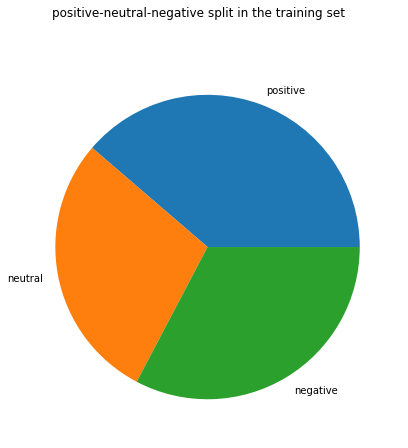

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
labels = ['positive', 'neutral', 'negative']
data = [y_train.count(2), y_train.count(1), y_train.count(0)]
plt.pie(data, labels = labels)
plt.suptitle('positive-neutral-negative split in the training set')
plt.show()

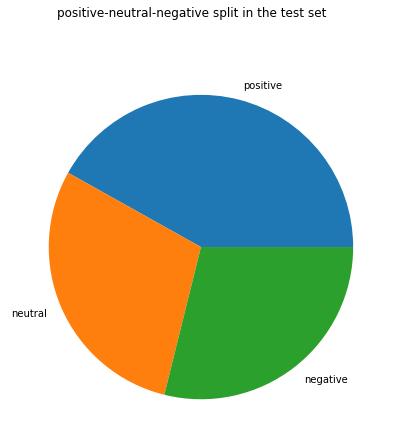

In [48]:
fig = plt.figure(figsize =(10, 7))
labels = ['positive', 'neutral', 'negative']
data = [y_test.count(2), y_test.count(1), y_test.count(0)]
plt.pie(data, labels = labels)
plt.suptitle('positive-neutral-negative split in the test set')
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)## Evauate Model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

## Evauate Model

In [50]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('fscore:',fscore)## Evauate Model

accuracy: 0.7396226415094339
precision: 0.8318141420182236
recall: 0.7067008184655243
fscore: 0.7213416366218727


## Plot Confusion Matrix

In [51]:
from sklearn.metrics import plot_confusion_matrix

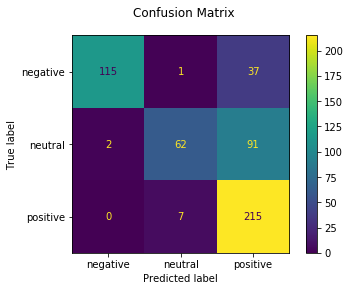

In [52]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = ['negative', 'neutral', 'positive'])
plt.suptitle('Confusion Matrix')
plt.show()